In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('./green-screen.jpg')

In [2]:
print(image.shape) # for future reference

(1080, 1920, 3)


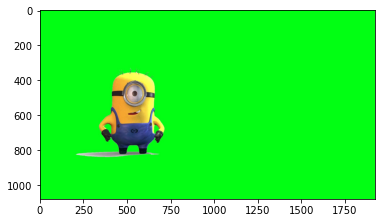

In [3]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [4]:
lower_green = np.array([0,100,0])
upper_green = np.array([120,255,100])

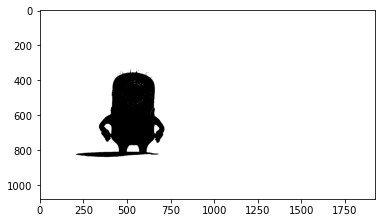

In [5]:
mask = cv2.inRange(image_copy, lower_green, upper_green)
plt.imshow(mask, cmap='gray')

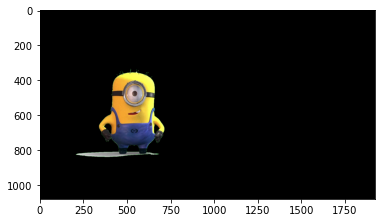

In [6]:
masked_image = np.copy(image_copy)
masked_image[mask!=0] = [0,0,0]
plt.imshow(masked_image)

In [7]:
bg_image = cv2.imread('./backdrop.jpg')
bg_image = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB)
crop_bg = bg_image[0:1080, 0:1920]

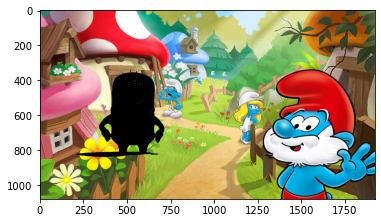

In [8]:
crop_bg[mask==0] = [0,0,0]
plt.imshow(crop_bg)

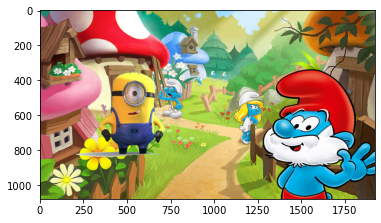

In [9]:
final_img = crop_bg + masked_image
plt.imshow(final_img)